In [84]:
import pandas as pd

In [85]:
# Reading the CSV file

data=pd.read_csv("C:\\Users\\Vignesh\Desktop\\Data Sets\\project.csv")

In [3]:
# Getting the information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
# Checking whether we have null values or not

data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [5]:
data['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [6]:
# Corelation

df=data.corr()
print(df)

                           ID  Customer_care_calls  Customer_rating  \
ID                   1.000000             0.188998        -0.005722   
Customer_care_calls  0.188998             1.000000         0.012209   
Customer_rating     -0.005722             0.012209         1.000000   
Cost_of_the_Product  0.196791             0.323182         0.009270   
Prior_purchases      0.145369             0.180771         0.013179   
Discount_offered    -0.598278            -0.130750        -0.003124   
Weight_in_gms        0.278312            -0.276615        -0.001897   
Reached.on.Time_Y.N -0.411822            -0.067126         0.013119   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
ID                              0.196791         0.145369         -0.598278   
Customer_care_calls             0.323182         0.180771         -0.130750   
Customer_rating                 0.009270         0.013179         -0.003124   
Cost_of_the_Product             1.000000    

<AxesSubplot:>

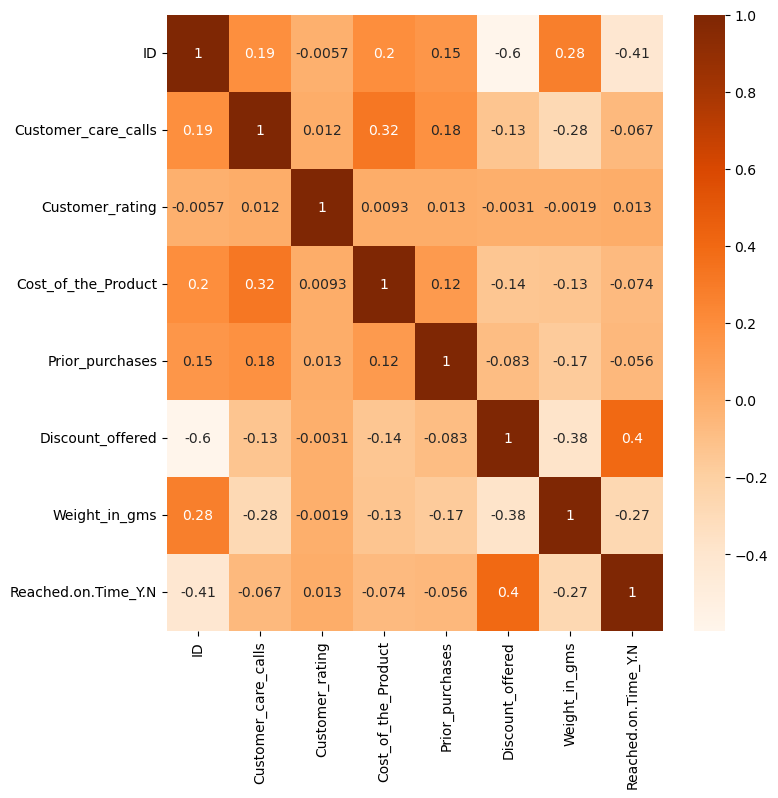

In [7]:
from matplotlib import pyplot as plt
import seaborn as sb
plt.figure(figsize=(8,8))
sb.heatmap(df, cmap='Oranges', annot=True)
           

In [8]:
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [9]:
# Selecting the target the variable

y=data['Reached.on.Time_Y.N']
y.value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [10]:
x=data.drop(['ID','Reached.on.Time_Y.N'],axis=1)
x.head(3)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,D,Flight,4,2,177,3,low,F,44,1233
1,F,Flight,4,5,216,2,low,M,59,3088
2,A,Flight,2,2,183,4,low,M,48,3374


In [13]:
# Preprocessing

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Gender']=le.fit_transform(x['Gender'])
x

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,D,Flight,4,2,177,3,low,0,44,1233
1,F,Flight,4,5,216,2,low,1,59,3088
2,A,Flight,2,2,183,4,low,1,48,3374
3,B,Flight,3,3,176,4,medium,1,10,1177
4,C,Flight,2,2,184,3,medium,0,46,2484
...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,0,1,1538
10995,B,Ship,4,1,232,5,medium,0,6,1247
10996,C,Ship,5,4,242,5,low,0,4,1155
10997,F,Ship,5,2,223,6,medium,1,2,1210


In [16]:
wb=pd.get_dummies(x.Warehouse_block)
wb

,A,B,C,D,F
0,0,0,0,1,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
10994,1,0,0,0,0
10995,0,1,0,0,0
10996,0,0,1,0,0
10997,0,0,0,0,1


In [17]:
mos=pd.get_dummies(x.Mode_of_Shipment)
mos

,Flight,Road,Ship
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
10994,0,0,1
10995,0,0,1
10996,0,0,1
10997,0,0,1


In [18]:
pi=pd.get_dummies(x.Product_importance)
pi

,high,low,medium
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
10994,0,0,1
10995,0,0,1
10996,0,1,0
10997,0,0,1


In [22]:
x=x.drop(['A','B','C','D','A','B','C','D','F','F'],axis=1)
x

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,D,Flight,4,2,177,3,low,0,44,1233
1,F,Flight,4,5,216,2,low,1,59,3088
2,A,Flight,2,2,183,4,low,1,48,3374
3,B,Flight,3,3,176,4,medium,1,10,1177
4,C,Flight,2,2,184,3,medium,0,46,2484
...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,0,1,1538
10995,B,Ship,4,1,232,5,medium,0,6,1247
10996,C,Ship,5,4,242,5,low,0,4,1155
10997,F,Ship,5,2,223,6,medium,1,2,1210


In [24]:
# Merging into the columns

x=pd.concat([x,wb],axis=1)
x

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,A,B,C,D,F
0,D,Flight,4,2,177,3,low,0,44,1233,0,0,0,1,0
1,F,Flight,4,5,216,2,low,1,59,3088,0,0,0,0,1
2,A,Flight,2,2,183,4,low,1,48,3374,1,0,0,0,0
3,B,Flight,3,3,176,4,medium,1,10,1177,0,1,0,0,0
4,C,Flight,2,2,184,3,medium,0,46,2484,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,0,1,1538,1,0,0,0,0
10995,B,Ship,4,1,232,5,medium,0,6,1247,0,1,0,0,0
10996,C,Ship,5,4,242,5,low,0,4,1155,0,0,1,0,0
10997,F,Ship,5,2,223,6,medium,1,2,1210,0,0,0,0,1


In [25]:
x=pd.concat([x,mos],axis=1)

In [26]:
x=pd.concat([x,pi],axis=1)
x

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,...,B,C,D,F,Flight,Road,Ship,high,low,medium
0,D,Flight,4,2,177,3,low,0,44,1233,...,0,0,1,0,1,0,0,0,1,0
1,F,Flight,4,5,216,2,low,1,59,3088,...,0,0,0,1,1,0,0,0,1,0
2,A,Flight,2,2,183,4,low,1,48,3374,...,0,0,0,0,1,0,0,0,1,0
3,B,Flight,3,3,176,4,medium,1,10,1177,...,1,0,0,0,1,0,0,0,0,1
4,C,Flight,2,2,184,3,medium,0,46,2484,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,0,1,1538,...,0,0,0,0,0,0,1,0,0,1
10995,B,Ship,4,1,232,5,medium,0,6,1247,...,1,0,0,0,0,0,1,0,0,1
10996,C,Ship,5,4,242,5,low,0,4,1155,...,0,1,0,0,0,0,1,0,1,0
10997,F,Ship,5,2,223,6,medium,1,2,1210,...,0,0,0,1,0,0,1,0,0,1


In [30]:
x.columns


Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'A', 'B', 'C', 'D', 'F', 'Flight', 'Road', 'Ship', 'high', 'low',
       'medium'],
      dtype='object')

In [31]:
x=x.drop(['Warehouse_block', 'Mode_of_Shipment','Product_importance'],axis=1)
x

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,A,B,C,D,F,Flight,Road,Ship,high,low,medium
0,4,2,177,3,0,44,1233,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,1,59,3088,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,1,48,3374,1,0,0,0,0,1,0,0,0,1,0
3,3,3,176,4,1,10,1177,0,1,0,0,0,1,0,0,0,0,1
4,2,2,184,3,0,46,2484,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,0,1,1538,1,0,0,0,0,0,0,1,0,0,1
10995,4,1,232,5,0,6,1247,0,1,0,0,0,0,0,1,0,0,1
10996,5,4,242,5,0,4,1155,0,0,1,0,0,0,0,1,0,1,0
10997,5,2,223,6,1,2,1210,0,0,0,0,1,0,0,1,0,0,1


In [33]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [62]:
# Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x,y)
y_predict=model.predict(x_test)
a=accuracy_score(y_test,y_predict)
b=confusion_matrix(y_test,y_predict)
c=classification_report(y_test,y_predict)
print("Accuracy",a)
print("CM",b)
print("Report",c)

Accuracy 0.6318181818181818
CM [[513 379]
 [431 877]]
Report               precision    recall  f1-score   support

           0       0.54      0.58      0.56       892
           1       0.70      0.67      0.68      1308

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.63      0.63      2200



In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error

In [70]:
model=RandomForestClassifier( n_estimators=100,criterion='gini')
model.fit(x,y)
y_predict=model.predict(x_test)
print(y_predict)
a=accuracy_score(y_test,y_predict)
b=confusion_matrix(y_test,y_predict)
c=classification_report(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
print("Accuracy",a)
print("CM",b)
print("Report",c)

[1 1 1 ... 0 0 0]
Accuracy 1.0
CM [[ 852    0]
 [   0 1348]]
Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00      1348

    accuracy                           1.00      2200
   macro avg       1.00      1.00      1.00      2200
weighted avg       1.00      1.00      1.00      2200



In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [80]:
model=DecisionTreeClassifier()
model.fit(x,y)
y_predict=model.predict(x_test)
a=accuracy_score(y_test,y_predict)
b=confusion_matrix(y_test,y_predict)
c=classification_report(y_test,y_predict)
print("Accuracy",a)
print("CM",b)
print("Report ",c)

Accuracy 1.0
CM [[1330    0]
 [   0 1970]]
Report                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1330
           1       1.00      1.00      1.00      1970

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300

